<a href="https://colab.research.google.com/github/victorsamson191/HDSC-Introduction-to-Python-for-machine-learning/blob/master/Hhamoye_Stage_c_Questions_and_Answers_Copy1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first I make sure that I uploaded the data and store it then I uploaded as u_df and the data description was as follows

In [ ]:
#Dataset Description
#Predictive features:

#'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
#'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
#'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

#Dependent variables:
#'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
#'stabf': a categorical (binary) label ('stable' or 'unstable')

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
u_df = pd.read_csv('Data_for_UCI_named.csv')
u_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [ ]:
#quick description of the
u_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [ ]:
u_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
u_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [ ]:
#drop 'stab' ecause of the direct relationship with 'stabf'
u_df = u_df .drop('stab', axis =1)
u_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [ ]:
#check distribution of target vari
u_df ['stabf'].value_counts()


unstable    6380
stable      3620
Name: stabf, dtype: int64

In [ ]:
u_df .head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [ ]:
#get features and labels
x = u_df .drop(columns=['stabf'])

y = u_df ['stabf']


In [ ]:
x, y

(          tau1      tau2      tau3      tau4        p1        p2        p3  \
 0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
 1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
 2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
 3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
 4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
 ...        ...       ...       ...       ...       ...       ...       ...   
 9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
 9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
 9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
 9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
 9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   
 
             p4        g1        g2        g3     

In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (8000, 12)
y_train shape: (8000,)
X_test shape: (2000, 12)
y_test shape: (2000,)


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [ ]:
dir(smote)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X_y',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit_resample',
 '_generate_samples',
 '_get_param_names',
 '_get_tags',
 '_in_danger_noise',
 '_make_samples',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sampling_strategy_docstring',
 '_sampling_type',
 '_validate_data',
 '_validate_estimator',
 '_validate_params',
 'feature_names_in_',
 'fit',
 'fit_resample',
 'get_feature_names_out',
 'get_params',
 'k_neighbors',
 'n_features_in_',
 '

In [ ]:
#transform train and test set using standard scaler
#ignore scaling for y since sklarn preprocessing ignores the y variable and it is also an object type.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
x_train_scaled

array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.55848751,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153361,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275632, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.7267806 ,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

In [ ]:
#put the scaled sets into a daataframe

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)


In [ ]:

x_train_scaled

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


In [ ]:
# Building a Model

In [ ]:
# Questions 14

In [ ]:
#train a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)

#fit on train set
rf.fit(x_train_scaled, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
#make predictions on test set
rf_pred = rf.predict(x_test_scaled)


In [ ]:
rf_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [ ]:
y_train1 = rf.predict(x_test_scaled)

In [ ]:
y_train1

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [ ]:
y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

In [ ]:
#model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy: {}'.format(round(accuracy*100), 4))

from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report

#precision
precision = precision_score(y_test, rf_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

#recall
recall = recall_score(y_test, rf_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

#F1 score
f1 = f1_score(y_test, rf_pred, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,rf_pred, digits =4))

#confusion matrix
rf_cnf_mat = confusion_matrix(y_test, rf_pred, labels=['unstable', 'stable'])
print('Confusion Matrix:\n', rf_cnf_mat)


Accuracy: 93
Precision: 92
Recall: 88
F1: 90
Classification Report:
               precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000

Confusion Matrix:
 [[1233   55]
 [  87  625]]


In [ ]:
print("Training set score: {:.3f}".format(rf.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rf.score(x_test_scaled, y_test).round(6)))


Training set score: 1.000
Test set score: 0.929


In [ ]:
# ExtraTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

#fit on the train set
etc.fit(x_train_scaled, y_train)


ExtraTreesClassifier(random_state=1)

In [ ]:
#predict on test set
etc_pred = etc.predict(x_test_scaled)
etc_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [ ]:
# AUESTIONS ONE USING THE

In [ ]:

# Measuring Model Performance for ExtraTreeClassifier

In [ ]:
#model accuracy
etc_accuracy = accuracy_score(y_test, etc_pred)
print('Accuracy: {}'.format(round(etc_accuracy*100), 2))

#precision
etc_precision = precision_score(y_test, etc_pred, pos_label='stable')
print('Precision: {}'.format(round(etc_precision*100), 2))

#recall
etc_recall = recall_score(y_test, etc_pred, pos_label='stable')
print('Recall: {}'.format(round(etc_recall*100), 2))

#F1 score
etc_f1 = f1_score(y_test, etc_pred, pos_label='stable')
print('F1: {}'.format(round(etc_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

#confusion matrix
etc_cnf_mat = confusion_matrix(y_test, etc_pred)
print('Confusion Matrix:\n', etc_cnf_mat)




Accuracy: 93
Precision: 94
Recall: 85
F1: 89
Classification Report:
               precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000

Confusion Matrix:
 [[ 606  106]
 [  38 1250]]


In [ ]:
print("Training set score: {:.3f}".format(etc.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(etc.score(x_test_scaled, y_test)))


Training set score: 1.000
Test set score: 0.928


In [ ]:
#XGBoost

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Standard scaler
#ignore the y variable since it is an object type.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns = x_train.columns)

normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns = x_test.columns)


In [ ]:
y_test

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
          ...   
3919      stable
162       stable
7903      stable
2242    unstable
2745    unstable
Name: stabf, Length: 2000, dtype: object

In [ ]:
y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

In [ ]:
y_train.replace({'stable': 1, 'unstable': 0})

2694    0
5140    0
2568    0
3671    0
7427    0
       ..
2895    1
7813    1
905     0
5192    0
235     1
Name: stabf, Length: 8000, dtype: int64

In [ ]:
y_train_pred = y_train.replace({'stable': 1, 'unstable': 0})

In [ ]:
from xgboost import XGBClassifier
xbg = XGBClassifier(random_state=1)

#fit on train set
xbg.fit(normalised_train_df, y_train_pred)

#predict on test set
xbg_pred = xbg.predict(normalised_test_df)

In [ ]:
# QUESTIONS 15

In [ ]:
from xgboost import XGBClassifier

xbc= XGBClassifier(random_state = 1)

#fit on train set
xbc.fit(x_train_scaled, y_train_pred)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
#predict on test set
xbc_pred = xbc.predict(x_test_scaled)


In [ ]:
xbc_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

In [ ]:
y_train_pred = y_train.replace({'stable': 1, 'unstable': 0})

In [ ]:
# Measuring Model Performace for XGB Classifier

In [ ]:
# USING THE SPLIT OF TEST = 20 AND TRAIN - 80 WILL NOT WORK SO i SPLIT IT TO BE 50-50

#Split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=1)

print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (5000, 12)
y_train shape: (5000,)
X_test shape: (5000, 12)
y_test shape: (5000,)


In [ ]:

#model accuracy
xbc_accuracy = accuracy_score(y_test, y_train )
print('Accuracy: {}'.format(round(xbc_accuracy*100), 2))

#precision
xbc_precision = precision_score(y_test, y_train, pos_label='stable')
print('Precision: {}'.format(round(xbc_precision*100), 2))

#recall
xbc_recall = recall_score(y_test, y_train, pos_label='stable')
print('Recall: {}'.format(round(xbc_recall*100), 2))

#F1 score
xbc_f1 = f1_score(y_test, y_train, pos_label='stable')
print('F1: {}'.format(round(xbc_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,y_train, digits =4))

#confusion matrix
xbc_cnf_mat = confusion_matrix(y_test, y_train)
print('Confusion Matrix:\n', xbc_cnf_mat)



Accuracy: 54
Precision: 37
Recall: 37
F1: 37
Classification Report:
               precision    recall  f1-score   support

      stable     0.3731    0.3694    0.3713      1819
    unstable     0.6415    0.6451    0.6433      3181

    accuracy                         0.5448      5000
   macro avg     0.5073    0.5073    0.5073      5000
weighted avg     0.5438    0.5448    0.5443      5000

Confusion Matrix:
 [[ 672 1147]
 [1129 2052]]


In [ ]:
#Accuracy
xbg_accuracy = accuracy_score(y_test, y_train)
print('Accuracy: {}'.format(round(xbg_accuracy*100), 2))

#Classification report
print('Classification Report:\n', classification_report(y_test,y_train, digits =4))


Accuracy: 54
Classification Report:
               precision    recall  f1-score   support

      stable     0.3731    0.3694    0.3713      1819
    unstable     0.6415    0.6451    0.6433      3181

    accuracy                         0.5448      5000
   macro avg     0.5073    0.5073    0.5073      5000
weighted avg     0.5438    0.5448    0.5443      5000



In [ ]:
y_train

4925      stable
3341    unstable
2470      stable
270     unstable
8123      stable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 5000, dtype: object

In [ ]:
y_test.isna().sum()

0

In [ ]:
y_train.isna().sum()

0

In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (8000, 12)
y_train shape: (8000,)
X_test shape: (2000, 12)
y_test shape: (2000,)


In [ ]:
print("Training set score: {:.3f}".format(rf.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rf.score(x_test_scaled, y_test)))


Training set score: 1.000
Test set score: 0.929


In [ ]:
# QUESTIONS 16

In [ ]:
# LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm= LGBMClassifier(random_state = 1)

#fit on train set
lgbm.fit(x_train_scaled, y_train)

LGBMClassifier(random_state=1)

In [ ]:
pip install LightGBM

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMClassifier

lgbm= LGBMClassifier(random_state = 1)

#fit on train set
lgbm.fit(x_train_scaled, y_train)

LGBMClassifier(random_state=1)

In [ ]:
#predict on test set
lgbm_pred = lgbm.predict(x_test_scaled)
lgbm_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [ ]:
# Model Performance for LGBM Classifier

In [ ]:
#model accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy: {}'.format(round(lgbm_accuracy*100), 2))

#precision
lgbm_precision = precision_score(y_test, lgbm_pred, pos_label='stable')
print('Precision: {}'.format(round(lgbm_precision*100), 2))

#recall
lgbm_recall = recall_score(y_test, lgbm_pred, pos_label='stable')
print('Recall: {}'.format(round(lgbm_recall*100), 2))

#F1 score
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='stable')
print('F1: {}'.format(round(lgbm_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,lgbm_pred, digits =4))

#confusion matrix
lgbm_cnf_mat = confusion_matrix(y_test, lgbm_pred)
print('Confusion Matrix:\n', lgbm_cnf_mat)



Accuracy: 94
Precision: 93
Recall: 90
F1: 91
Classification Report:
               precision    recall  f1-score   support

      stable     0.9276    0.9003    0.9138       712
    unstable     0.9458    0.9612    0.9534      1288

    accuracy                         0.9395      2000
   macro avg     0.9367    0.9307    0.9336      2000
weighted avg     0.9393    0.9395    0.9393      2000

Confusion Matrix:
 [[ 641   71]
 [  50 1238]]


In [ ]:
# Improving ExtraTreesClassifier

In [ ]:
#combination of hyperparameters
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

hyperparameter_grid


{'n_estimators': [50, 100, 300, 500, 1000],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 3, 5, 7, 9],
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#etc = ExtraTreesClassifier(random_state = 1)

#set up randomsearch with 5folds
randomcv = RandomizedSearchCV(estimator = etc,
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)
randomcv

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [ ]:
#fit on the training data
search = randomcv.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#get best parameters
search.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [ ]:
#check feature importances
importance = etc.feature_importances_
importance

array([0.11739736, 0.11844468, 0.11316851, 0.11546569, 0.03950675,
       0.04037132, 0.04070628, 0.04057864, 0.08978291, 0.09367636,
       0.09688268, 0.09401882])

In [ ]:
#print feature importances
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.11740
Feature: 1, Score: 0.11844
Feature: 2, Score: 0.11317
Feature: 3, Score: 0.11547
Feature: 4, Score: 0.03951
Feature: 5, Score: 0.04037
Feature: 6, Score: 0.04071
Feature: 7, Score: 0.04058
Feature: 8, Score: 0.08978
Feature: 9, Score: 0.09368
Feature: 10, Score: 0.09688
Feature: 11, Score: 0.09402


In [ ]:
x_train_scaled.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [ ]:
#get best score
search.best_score_


0.9241249999999999

In [ ]:
#Evaluate ExtraTreesClassifier on test set using  best params
etc2 = ExtraTreesClassifier(max_features = None,
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000,
                            random_state = 1)

#fit on train set
etc2.fit(x_train_scaled, y_train)


ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [ ]:




#predict on test set
etc2_pred = etc2.predict(x_test_scaled)


In [ ]:
#classification report
print('Classification Report:\n', classification_report(y_test,etc2_pred, digits =4))

Classification Report:
               precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



<AxesSubplot:>

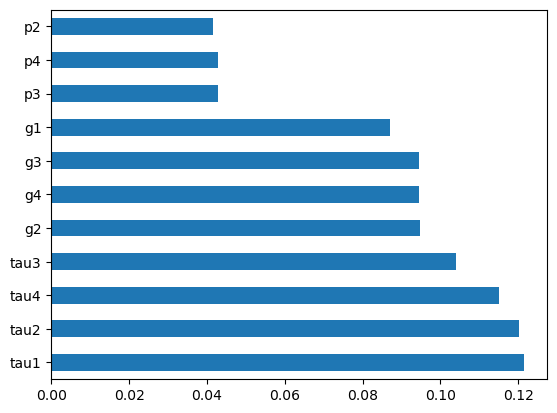

In [ ]:
#plot graph of feature importance
feat_importance = pd.Series(etc.feature_importances_, index = x.columns)
feat_importance.nlargest(11).plot(kind='barh')
